In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
# # Load the original dataframe and the cluster dataframe
# def load_and_merge_data(original_df_path, cluster_df_path):
#     """
#     Load original dataframe and cluster dataframe, merge them on conversation_hash.
    
#     Parameters:
#     -----------
#     original_df_path : str
#         Path to the original dataframe pickle file
#     cluster_df_path : str
#         Path to the cluster dataframe pickle file
        
#     Returns:
#     --------
#     DataFrame
#         Merged dataframe with cluster information
#     """
#     print(f"Loading original dataframe from {original_df_path}")
#     original_df = pd.read_pickle(original_df_path)

#     # drop the cluster column
#     original_df = original_df.drop(columns=['cluster'])
#     # drop duplicates based on conversation_hash
#     original_df = original_df.drop_duplicates(subset=['conversation_hash'])
    
#     print(f"Loading cluster dataframe from {cluster_df_path}")
#     cluster_df = pd.read_pickle(cluster_df_path)
    
#     # Merge dataframes on conversation_hash
#     print("Merging dataframes...")
#     merged_df = original_df.merge(
#         cluster_df[['conversation_hash', 'cluster']], 
#         on='conversation_hash', 
#         how='left'
#     )
    
#     # Check for missing cluster assignments
#     missing_clusters = merged_df['cluster'].isna().sum()
#     if missing_clusters > 0:
#         print(f"Warning: {missing_clusters} rows ({missing_clusters/len(merged_df):.2%}) have no cluster assignment")
    
#     print(f"Merged dataframe shape: {merged_df.shape}")
#     print(f"Number of unique clusters: {merged_df['cluster'].nunique()}")
    
#     return merged_df

In [10]:
# # Example usage
# merged_df = load_and_merge_data(
#     "wildchat_english_clustered_50.pkl",
#     "embedding_viz_clusters.pkl"
# )

Loading original dataframe from wildchat_english_clustered_50.pkl
Loading cluster dataframe from embedding_viz_clusters.pkl
Merging dataframes...
Merged dataframe shape: (478498, 7)
Number of unique clusters: 60


In [5]:
df = pd.read_pickle('wildchat_english_60_cluster.pkl')

In [6]:
df.head()

,conversation_hash,hashed_ip,timestamp,conversation,first_user_query,device_type,cluster
0,c9ec5b440fbdd2a269333dd241f32f64,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:02:53+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10
1,cf1267ca6b2f6fccc9c36652a00059a1,8133108d1c433c180c6be8302dc5a6681f2bec980190a1...,2023-04-09 00:04:52+00:00,"[{'content': 'Old age PT hx of DM, HTN, dyslip...","Old age PT hx of DM, HTN, dyslipidemia His ECG...",windows,41
2,e98d3e74c57f9a65261df393d9124ac2,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:06:49+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10
3,2e8fd255aab694b07a0be8d83cb53a7b,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:08:41+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,49
4,59c72510f3143025f94f75b883b026bd,dbf18c49cf217bc344a40b187ed35c3219f994b1d3b2d0...,2023-04-09 00:10:00+00:00,[{'content': 'i wanna you to write me terms & ...,i wanna you to write me terms & conditions and...,windows,2


### Show some samples from a Cluster

In [13]:
# Function to examine random examples from a specific cluster
def explore_cluster(df, cluster_id, n_samples=5, text_column='first_user_query', seed=None):
    """
    Display random examples from a specific cluster.
    
    Parameters:
    -----------
    df : DataFrame
        Dataframe with cluster assignments
    cluster_id : int
        Cluster ID to explore
    n_samples : int, default=5
        Number of random samples to display
    text_column : str, default='first_user_query'
        Column containing text to display
    seed : int, optional
        Random seed for reproducibility
    
    Returns:
    --------
    DataFrame
        Sample of rows from the specified cluster
    """
    # Set random seed if provided
    if seed is not None:
        np.random.seed(seed)
    
    # Filter dataframe for the specified cluster
    cluster_df = df[df['cluster'] == cluster_id].copy()
    
    if len(cluster_df) == 0:
        print(f"No examples found for cluster {cluster_id}")
        return pd.DataFrame()
    
    # Select random samples
    if len(cluster_df) <= n_samples:
        samples = cluster_df
        print(f"Showing all {len(samples)} examples from cluster {cluster_id}")
    else:
        sample_indices = np.random.choice(len(cluster_df), n_samples, replace=False)
        samples = cluster_df.iloc[sample_indices].reset_index(drop=True)
        print(f"Showing {n_samples} random examples from cluster {cluster_id} (total: {len(cluster_df)})")
    
    # Display samples with limited columns for readability
    display_cols = [text_column, 'timestamp', 'device_type', 'num_turns']
    display_cols = [col for col in display_cols if col in samples.columns]
    
    return samples[display_cols]



In [18]:
# Example usage
random_samples = explore_cluster(merged_df, cluster_id=42, n_samples=5)
display(random_samples)

Showing 5 random examples from cluster 42 (total: 32108)


,first_user_query,timestamp,device_type
0,\n As a prompt gene...,2023-09-05 06:50:11+00:00,windows
1,\n As a prompt gene...,2023-12-19 02:53:33+00:00,windows
2,\n As a prompt gene...,2024-02-21 06:18:51+00:00,windows
3,\n As a prompt gene...,2024-03-12 11:48:09+00:00,windows
4,\n As a prompt gene...,2023-07-24 03:44:38+00:00,windows


C:\Users\Admin\AppData\Local\Temp\ipykernel_142144\4169433588.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


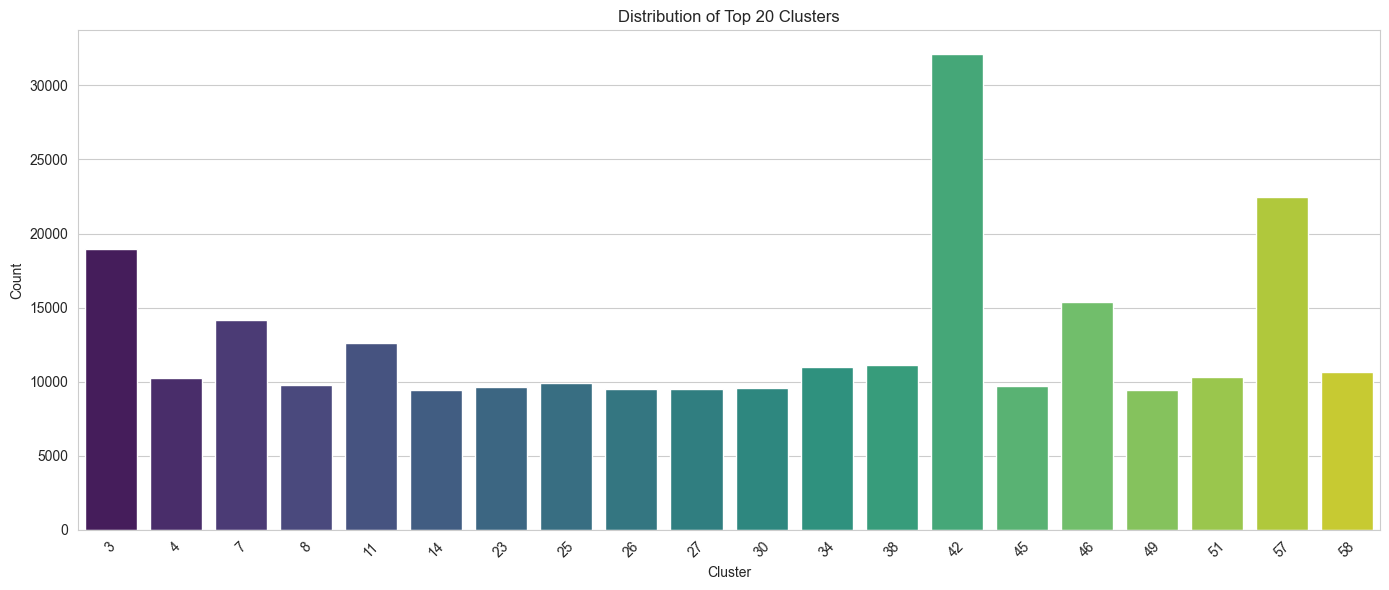

Total clusters: 60
Largest cluster: Cluster 42.0 with 32108.0 items (6.71%)
Smallest cluster: Cluster 36.0 with 473.0 items (0.10%)


,Cluster,Count,Percentage
0,42,32108,6.710164
1,57,22467,4.695317
2,3,18938,3.957801
3,46,15395,3.217359
4,7,14133,2.953617
5,11,12610,2.635330
6,38,11154,2.331044
7,34,10975,2.293636
8,58,10682,2.232402
9,51,10329,2.158630


In [15]:
# Function to summarize cluster sizes and distribution
def summarize_clusters(df, cluster_column='cluster'):
    """
    Summarize cluster sizes and visualize the distribution.
    
    Parameters:
    -----------
    df : DataFrame
        Dataframe with cluster assignments
    cluster_column : str, default='cluster'
        Column name containing cluster IDs
        
    Returns:
    --------
    DataFrame
        Summary statistics for each cluster
    """
    # Calculate cluster sizes
    cluster_sizes = df[cluster_column].value_counts().reset_index()
    cluster_sizes.columns = ['Cluster', 'Count']
    cluster_sizes['Percentage'] = 100 * cluster_sizes['Count'] / len(df)
    
    # Sort by size
    cluster_sizes = cluster_sizes.sort_values('Count', ascending=False).reset_index(drop=True)
    
    # Plot distribution
    plt.figure(figsize=(14, 6))
    
    # Bar plot for top clusters
    top_n = min(20, len(cluster_sizes))
    sns.barplot(
        x='Cluster', 
        y='Count', 
        data=cluster_sizes.head(top_n),
        palette='viridis'
    )
    plt.title(f'Distribution of Top {top_n} Clusters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"Total clusters: {len(cluster_sizes)}")
    print(f"Largest cluster: Cluster {cluster_sizes.iloc[0]['Cluster']} with {cluster_sizes.iloc[0]['Count']} items ({cluster_sizes.iloc[0]['Percentage']:.2f}%)")
    print(f"Smallest cluster: Cluster {cluster_sizes.iloc[-1]['Cluster']} with {cluster_sizes.iloc[-1]['Count']} items ({cluster_sizes.iloc[-1]['Percentage']:.2f}%)")
    
    return cluster_sizes

# Example usage
cluster_summary = summarize_clusters(merged_df)
display(cluster_summary.head(10))

C:\Users\Admin\AppData\Local\Temp\ipykernel_142144\2424510493.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=word_df.head(15), palette='viridis')


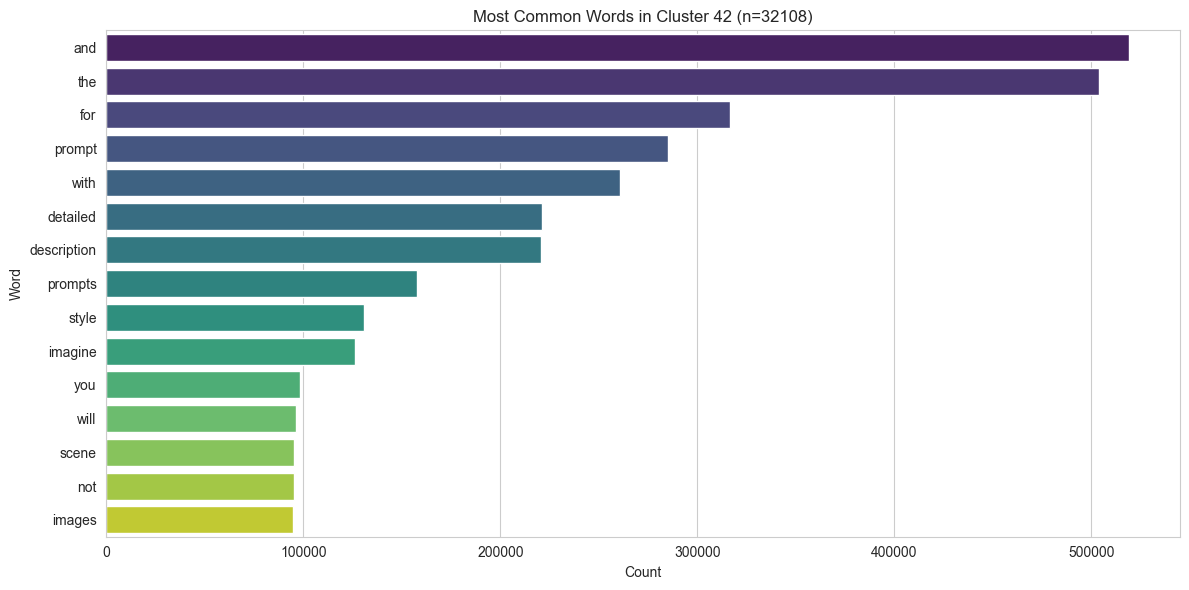

,Word,Count
0,and,519104
1,the,503861
2,for,316824
3,prompt,284988
4,with,260874
5,detailed,220993
6,description,220426
7,prompts,157939
8,style,130574
9,imagine,126019


In [16]:
# Function to analyze most common terms in a specific cluster
def analyze_cluster_content(df, cluster_id, text_column='first_user_query', 
                           n_words=20, min_word_length=3):
    """
    Analyze the most common words and n-grams in a specific cluster.
    
    Parameters:
    -----------
    df : DataFrame
        Dataframe with cluster assignments
    cluster_id : int
        Cluster ID to analyze
    text_column : str, default='first_user_query'
        Column containing text to analyze
    n_words : int, default=20
        Number of top words to display
    min_word_length : int, default=3
        Minimum word length to include
        
    Returns:
    --------
    DataFrame
        DataFrame with word frequency counts
    """
    from sklearn.feature_extraction.text import CountVectorizer
    from collections import Counter
    import re
    
    # Filter dataframe for the specified cluster
    cluster_df = df[df['cluster'] == cluster_id]
    
    if len(cluster_df) == 0:
        print(f"No examples found for cluster {cluster_id}")
        return pd.DataFrame()
    
    # Combine all text in the cluster
    all_text = ' '.join(cluster_df[text_column].astype(str).fillna(''))
    
    # Clean text: remove punctuation and convert to lowercase
    clean_text = re.sub(r'[^\w\s]', ' ', all_text.lower())
    
    # Create word tokens
    words = [word for word in clean_text.split() if len(word) >= min_word_length]
    
    # Count word frequencies
    word_counts = Counter(words)
    
    # Convert to DataFrame
    word_df = pd.DataFrame(word_counts.most_common(n_words), columns=['Word', 'Count'])
    
    # Visualize
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Word', data=word_df.head(15), palette='viridis')
    plt.title(f'Most Common Words in Cluster {cluster_id} (n={len(cluster_df)})')
    plt.tight_layout()
    plt.show()
    
    return word_df

# Example usage
word_analysis = analyze_cluster_content(merged_df, cluster_id=42)
display(word_analysis)

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Step 1: Check for GPU and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('Genius1237/xlm-roberta-large-tydip')
model = AutoModelForSequenceClassification.from_pretrained('Genius1237/xlm-roberta-large-tydip')

# Step 3: Move the model to GPU (if available)
model.to(device)

# Example: Preparing inputs and ensuring they are on the correct device
text = "This is an example input."
inputs = tokenizer(text, return_tensors="pt")
# Move the input tensors to the same device as the model
inputs = {key: value.to(device) for key, value in inputs.items()}

# Step 4: Run model inference
with torch.no_grad():
    outputs = model(**inputs)

print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-1.0968,  0.8825]], device='cuda:0'), hidden_states=None, attentions=None)


In [2]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Assuming you have already loaded your model and tokenizer
# tokenizer = AutoTokenizer.from_pretrained('Genius1237/xlm-roberta-large-tydip')
# model = AutoModelForSequenceClassification.from_pretrained('Genius1237/xlm-roberta-large-tydip')
# model.to(device)  # Ensure the model is on GPU if available

# Example input
text = "This is an example input."
inputs = tokenizer(text, return_tensors="pt")
inputs = {key: value.to(model.device) for key, value in inputs.items()}

# Get model outputs
with torch.no_grad():
    outputs = model(**inputs)

# Extract logits from the outputs
logits = outputs.logits  # This is a tensor of shape [batch_size, num_labels]

# Step 1: Convert logits to probabilities using softmax (optional)
probs = F.softmax(logits, dim=1)
print("Probabilities:", probs)

# Step 2: Determine the predicted class by using argmax (the index of the maximum logit)
predicted_index = torch.argmax(probs, dim=1).item()
print("Predicted class index:", predicted_index)

# If the model's config has an id2label mapping, you can look up the actual label:
if hasattr(model.config, "id2label"):
    predicted_label = model.config.id2label[predicted_index]
    print("Predicted label:", predicted_label)
else:
    print("Label mapping (id2label) not found in model configuration. The predicted class index is", predicted_index)


Probabilities: tensor([[0.1214, 0.8786]], device='cuda:0')
Predicted class index: 1
Predicted label: polite


In [7]:
import torch
import torch.nn.functional as F
import pandas as pd
from tqdm import tqdm  # Provides a progress bar
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Set batch size (adjust based on available GPU memory)
batch_size = 32

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model, then move the model to the device
tokenizer = AutoTokenizer.from_pretrained('Genius1237/xlm-roberta-large-tydip')
model = AutoModelForSequenceClassification.from_pretrained('Genius1237/xlm-roberta-large-tydip')
model.to(device)
model.eval()  # Set the model to evaluation mode

# Prepare empty lists to store predictions and scores
all_predicted_labels = []
all_predicted_scores = []

# Loop over the DataFrame in batches using tqdm for a progress bar
for start in tqdm(range(0, len(df), batch_size)):
    # Get a batch of text queries
    batch_texts = df['first_user_query'][start:start + batch_size].tolist()

    # Tokenize the batch with padding and truncation as needed
    inputs = tokenizer(batch_texts,
                       return_tensors="pt",
                       padding=True,
                       truncation=True)
    # Move the inputs to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Run the model on the batch (disable gradient computation for efficiency)
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract logits from the output, then compute probabilities with softmax
    logits = outputs.logits  # shape: [batch_size, num_labels]
    probs = F.softmax(logits, dim=1)

    # Determine predicted indices from the probabilities
    preds = torch.argmax(probs, dim=1)

    # Retrieve probability scores corresponding to the predicted indices and map to labels
    batch_scores = [probs[i, preds[i]].item() for i in range(len(preds))]
    # Use model.config.id2label mapping if available
    if hasattr(model.config, "id2label"):
        batch_labels = [model.config.id2label[pred.item()] for pred in preds]
    else:
        batch_labels = [pred.item() for pred in preds]

    # Extend the results lists
    all_predicted_labels.extend(batch_labels)
    all_predicted_scores.extend(batch_scores)

# Add the prediction results to the dataframe
df['predicted_label'] = all_predicted_labels
df['predicted_score'] = all_predicted_scores

# Optionally, inspect the updated DataFrame:
print(df.head())


100%|██████████| 14954/14954 [1:28:16<00:00,  2.82it/s]

                  conversation_hash  \
0  c9ec5b440fbdd2a269333dd241f32f64   
1  cf1267ca6b2f6fccc9c36652a00059a1   
2  e98d3e74c57f9a65261df393d9124ac2   
3  2e8fd255aab694b07a0be8d83cb53a7b   
4  59c72510f3143025f94f75b883b026bd   

                                           hashed_ip  \
0  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
1  8133108d1c433c180c6be8302dc5a6681f2bec980190a1...   
2  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
3  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
4  dbf18c49cf217bc344a40b187ed35c3219f994b1d3b2d0...   

                  timestamp  \
0 2023-04-09 00:02:53+00:00   
1 2023-04-09 00:04:52+00:00   
2 2023-04-09 00:06:49+00:00   
3 2023-04-09 00:08:41+00:00   
4 2023-04-09 00:10:00+00:00   

                                        conversation  \
0  [{'content': 'Hey there! Are you familiar with...   
1  [{'content': 'Old age PT hx of DM, HTN, dyslip...   
2  [{'content': 'Hey there! Are you familiar with...   
3  [{'content': '

In [8]:
# Save the DataFrame to a pickle file
df.to_pickle('clusters_with_typid_predictions.pkl')


Or, if the goal is polite guard..

In [9]:
import torch
import torch.nn.functional as F
import pandas as pd
from tqdm import tqdm  # For the progress bar
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Assume df is your DataFrame loaded with ~500k rows and it contains a 'first_user_query' column.
# For example: df = pd.read_csv('your_file.csv')

# Set the batch size (adjust this based on your GPU memory)
batch_size = 32

# Set the device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and model for "Intel/polite-guard" and move the model to the device
tokenizer = AutoTokenizer.from_pretrained("Intel/polite-guard")
model = AutoModelForSequenceClassification.from_pretrained("Intel/polite-guard")
model.to(device)
model.eval()  # Set the model to evaluation mode

# Prepare lists to store the prediction results
all_predicted_labels = []
all_predicted_scores = []

# Process the DataFrame in batches
for start in tqdm(range(0, len(df), batch_size)):
    # Slice out a batch of text queries
    batch_texts = df['first_user_query'][start:start + batch_size].tolist()

    # Tokenize the batch with automatic padding and truncation
    inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)
    
    # Move input tensors to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Disable gradients for inference
    with torch.no_grad():
        outputs = model(**inputs)

    # The model outputs raw scores (logits) for each class
    logits = outputs.logits  # Shape: [batch_size, num_labels]

    # Convert logits into probabilities using softmax
    probs = F.softmax(logits, dim=1)

    # Get the predicted class indices for the batch
    preds = torch.argmax(probs, dim=1)

    # Extract the confidence scores for the predicted classes
    batch_scores = [probs[i, preds[i]].item() for i in range(len(preds))]
    
    # If available, use the model’s id2label mapping to get a human-readable label
    if hasattr(model.config, "id2label"):
        batch_labels = [model.config.id2label[pred.item()] for pred in preds]
    else:
        batch_labels = [pred.item() for pred in preds]

    # Append the results to our lists
    all_predicted_labels.extend(batch_labels)
    all_predicted_scores.extend(batch_scores)

# Append the predictions and scores to the original DataFrame
df['predicted_label'] = all_predicted_labels
df['predicted_score'] = all_predicted_scores

# Optionally, inspect the first few rows to verify
print(df.head())


100%|██████████| 14954/14954 [30:58<00:00,  8.04it/s]

                  conversation_hash  \
0  c9ec5b440fbdd2a269333dd241f32f64   
1  cf1267ca6b2f6fccc9c36652a00059a1   
2  e98d3e74c57f9a65261df393d9124ac2   
3  2e8fd255aab694b07a0be8d83cb53a7b   
4  59c72510f3143025f94f75b883b026bd   

                                           hashed_ip  \
0  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
1  8133108d1c433c180c6be8302dc5a6681f2bec980190a1...   
2  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
3  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
4  dbf18c49cf217bc344a40b187ed35c3219f994b1d3b2d0...   

                  timestamp  \
0 2023-04-09 00:02:53+00:00   
1 2023-04-09 00:04:52+00:00   
2 2023-04-09 00:06:49+00:00   
3 2023-04-09 00:08:41+00:00   
4 2023-04-09 00:10:00+00:00   

                                        conversation  \
0  [{'content': 'Hey there! Are you familiar with...   
1  [{'content': 'Old age PT hx of DM, HTN, dyslip...   
2  [{'content': 'Hey there! Are you familiar with...   
3  [{'content': '

In [10]:
# Save the DataFrame with predictions to a pickle file
df.to_pickle('wildchat_60_cluster_two_polite.pkl')

In [26]:
import pandas as pd

df = pd.read_pickle('wildchat_60_cluster_two_polite.pkl')

In [27]:
import torch
import torch.nn.functional as F
import pandas as pd
from tqdm import tqdm  # For the progress bar
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Assume df is your DataFrame loaded with ~500k rows and it contains a 'first_user_query' column.
# For example: df = pd.read_csv('your_file.csv')

# Set the batch size (adjust this based on your GPU memory)
batch_size = 32

# Set the device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and model for "Intel/polite-guard" and move the model to the device
tokenizer = AutoTokenizer.from_pretrained("s-nlp/xlmr_formality_classifier")
model = AutoModelForSequenceClassification.from_pretrained("s-nlp/xlmr_formality_classifier")
model.to(device)
model.eval()  # Set the model to evaluation mode

# Prepare lists to store the prediction results
all_predicted_labels = []
all_predicted_scores = []

# Process the DataFrame in batches
for start in tqdm(range(0, len(df), batch_size)):
    # Slice out a batch of text queries
    batch_texts = df['first_user_query'][start:start + batch_size].tolist()

    # Tokenize the batch with automatic padding and truncation
    inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)
    
    # Move input tensors to the same device as the model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Disable gradients for inference
    with torch.no_grad():
        outputs = model(**inputs)

    # The model outputs raw scores (logits) for each class
    logits = outputs.logits  # Shape: [batch_size, num_labels]

    # Convert logits into probabilities using softmax
    probs = F.softmax(logits, dim=1)

    # Get the predicted class indices for the batch
    preds = torch.argmax(probs, dim=1)

    # Extract the confidence scores for the predicted classes
    batch_scores = [probs[i, preds[i]].item() for i in range(len(preds))]
    
    # If available, use the model’s id2label mapping to get a human-readable label
    if hasattr(model.config, "id2label"):
        batch_labels = [model.config.id2label[pred.item()] for pred in preds]
    else:
        batch_labels = [pred.item() for pred in preds]

    # Append the results to our lists
    all_predicted_labels.extend(batch_labels)
    all_predicted_scores.extend(batch_scores)

# Append the predictions and scores to the original DataFrame
df['formality_label'] = all_predicted_labels
df['formality_score'] = all_predicted_scores

# Optionally, inspect the first few rows to verify
print(df.head())

tokenizer_config.json:   0%|          | 0.00/398 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/896 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

100%|██████████| 14954/14954 [33:55<00:00,  7.34it/s]

                  conversation_hash  \
0  c9ec5b440fbdd2a269333dd241f32f64   
1  cf1267ca6b2f6fccc9c36652a00059a1   
2  e98d3e74c57f9a65261df393d9124ac2   
3  2e8fd255aab694b07a0be8d83cb53a7b   
4  59c72510f3143025f94f75b883b026bd   

                                           hashed_ip  \
0  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
1  8133108d1c433c180c6be8302dc5a6681f2bec980190a1...   
2  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
3  22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...   
4  dbf18c49cf217bc344a40b187ed35c3219f994b1d3b2d0...   

                  timestamp  \
0 2023-04-09 00:02:53+00:00   
1 2023-04-09 00:04:52+00:00   
2 2023-04-09 00:06:49+00:00   
3 2023-04-09 00:08:41+00:00   
4 2023-04-09 00:10:00+00:00   

                                        conversation  \
0  [{'content': 'Hey there! Are you familiar with...   
1  [{'content': 'Old age PT hx of DM, HTN, dyslip...   
2  [{'content': 'Hey there! Are you familiar with...   
3  [{'content': '

In [28]:
df.to_pickle('wildchat_60_cluster_formality.pkl')

In [29]:
df.head()

,conversation_hash,hashed_ip,timestamp,conversation,first_user_query,device_type,cluster,typid_label,typid_score,politeguard_label,politeguard_score,formality_label,formality_score
0,c9ec5b440fbdd2a269333dd241f32f64,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:02:53+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10,polite,0.932727,polite,0.986204,formal,0.998626
1,cf1267ca6b2f6fccc9c36652a00059a1,8133108d1c433c180c6be8302dc5a6681f2bec980190a1...,2023-04-09 00:04:52+00:00,"[{'content': 'Old age PT hx of DM, HTN, dyslip...","Old age PT hx of DM, HTN, dyslipidemia His ECG...",windows,41,polite,0.888530,neutral,0.623107,informal,0.900437
2,e98d3e74c57f9a65261df393d9124ac2,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:06:49+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10,polite,0.936191,polite,0.987203,formal,0.998625
3,2e8fd255aab694b07a0be8d83cb53a7b,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:08:41+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,49,polite,0.929415,polite,0.987390,formal,0.998623
4,59c72510f3143025f94f75b883b026bd,dbf18c49cf217bc344a40b187ed35c3219f994b1d3b2d0...,2023-04-09 00:10:00+00:00,[{'content': 'i wanna you to write me terms & ...,i wanna you to write me terms & conditions and...,windows,2,polite,0.922587,polite,0.955610,informal,0.997220


In [14]:
import pickle

# Load both pickle files
with open('clusters_with_typid_predictions.pkl', 'rb') as f:
    typid_data = pickle.load(f)

with open('wildchat_60_cluster_polite_guard.pkl', 'rb') as f:
    polite_data = pickle.load(f)

# Rename columns in typid data
typid_data = typid_data.rename(columns={
    'predicted_label': 'typid_label',
    'predicted_score': 'typid_score'
})

# Rename columns in polite data
polite_data = polite_data.rename(columns={
    'predicted_label': 'politeguard_label',
    'predicted_score': 'politeguard_score'
})

# Merge the dataframes
# Assuming both dataframes have the same index or a common identifier
merged_data = pd.merge(
    typid_data,
    polite_data[['politeguard_label', 'politeguard_score']],
    left_index=True,
    right_index=True,
    how='inner'
)

In [21]:
polite_data.shape   

(478498, 9)

In [22]:
# Save the merged DataFrame with both politeness predictions to a pickle file
merged_data.to_pickle('wildchat_60_cluster_two_polite.pkl')


In [18]:
merged_data.head()

,conversation_hash,hashed_ip,timestamp,conversation,first_user_query,device_type,cluster,typid_label,typid_score,politeguard_label,politeguard_score
0,c9ec5b440fbdd2a269333dd241f32f64,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:02:53+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10,polite,0.932727,polite,0.986204
1,cf1267ca6b2f6fccc9c36652a00059a1,8133108d1c433c180c6be8302dc5a6681f2bec980190a1...,2023-04-09 00:04:52+00:00,"[{'content': 'Old age PT hx of DM, HTN, dyslip...","Old age PT hx of DM, HTN, dyslipidemia His ECG...",windows,41,polite,0.888530,neutral,0.623107
2,e98d3e74c57f9a65261df393d9124ac2,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:06:49+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,10,polite,0.936191,polite,0.987203
3,2e8fd255aab694b07a0be8d83cb53a7b,22fd87ba9b98f3d379b23c7b52961f2d4a8505127e58b3...,2023-04-09 00:08:41+00:00,[{'content': 'Hey there! Are you familiar with...,Hey there! Are you familiar with reality shift...,windows,49,polite,0.929415,polite,0.987390
4,59c72510f3143025f94f75b883b026bd,dbf18c49cf217bc344a40b187ed35c3219f994b1d3b2d0...,2023-04-09 00:10:00+00:00,[{'content': 'i wanna you to write me terms & ...,i wanna you to write me terms & conditions and...,windows,2,polite,0.922587,polite,0.955610


C:\Users\Admin\AppData\Local\Temp\ipykernel_33028\2417830000.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conversation Length', y='Count', data=length_df, palette='viridis')


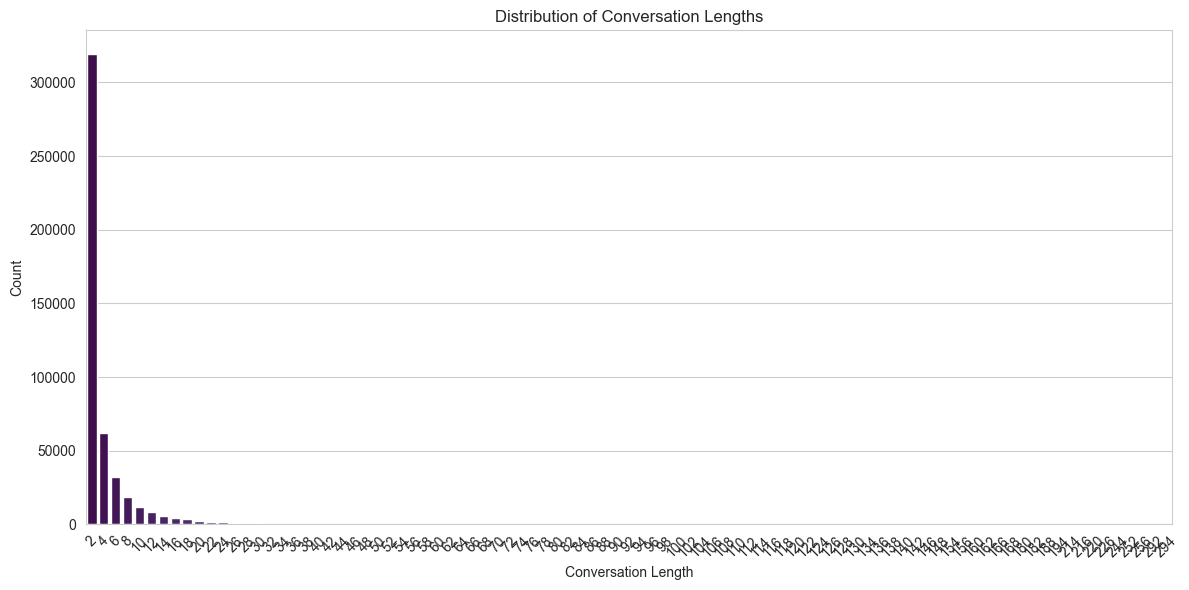


Conversation Length Distribution:
    Conversation Length   Count  Percentage
0                     2  319364   66.743017
1                     4   62070   12.971841
2                     6   31975    6.682369
3                     8   18927    3.955502
4                    10   11907    2.488412
..                  ...     ...         ...
86                  244       1    0.000209
87                  252       1    0.000209
88                  256       1    0.000209
89                  292       1    0.000209
90                  294       1    0.000209

[91 rows x 3 columns]


In [24]:
# Calculate conversation length distribution
conversation_lengths = merged_data['conversation'].apply(len)
length_counts = conversation_lengths.value_counts().sort_index()
length_percentages = conversation_lengths.value_counts(normalize=True).sort_index() * 100

# Create a DataFrame for visualization
length_df = pd.DataFrame({
    'Count': length_counts,
    'Percentage': length_percentages
}).reset_index()
length_df.columns = ['Conversation Length', 'Count', 'Percentage']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Conversation Length', y='Count', data=length_df, palette='viridis')
plt.title('Distribution of Conversation Lengths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the counts and percentages
print("\nConversation Length Distribution:")
print(length_df)


C:\Users\Admin\AppData\Local\Temp\ipykernel_33028\3626133763.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Device Type', y='Count', data=device_df, palette='viridis')


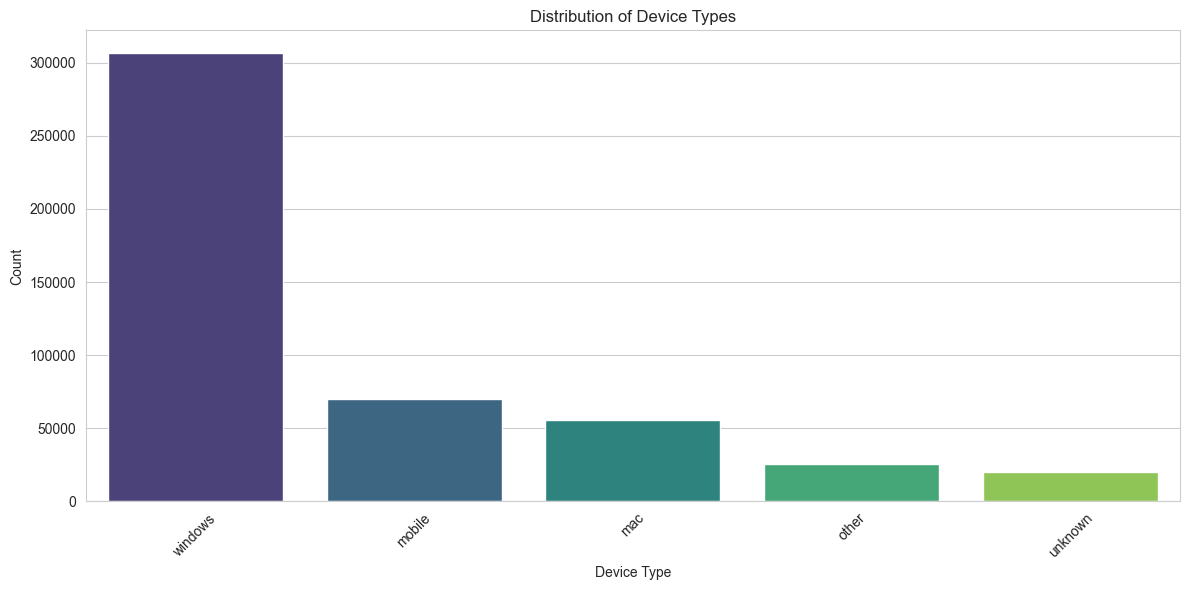


Device Type Distribution:
  Device Type   Count  Percentage
0     windows  306623   64.080310
1      mobile   69987   14.626393
2         mac   55882   11.678628
3       other   25600    5.350075
4     unknown   20406    4.264595


In [23]:
# Explore device type distribution
device_counts = merged_data['device_type'].value_counts()
device_percentages = merged_data['device_type'].value_counts(normalize=True) * 100

# Create a DataFrame for visualization
device_df = pd.DataFrame({
    'Count': device_counts,
    'Percentage': device_percentages
}).reset_index()
device_df.columns = ['Device Type', 'Count', 'Percentage']

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Device Type', y='Count', data=device_df, palette='viridis')
plt.title('Distribution of Device Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the counts and percentages
print("\nDevice Type Distribution:")
print(device_df)


In [25]:
import os
import glob

# Define the output file path
output_file = 'combined_cluster_summaries.txt'

# Get all txt files in the llm_analyses directory and its subdirectories
txt_files = glob.glob('llm_analyses/**/*.txt', recursive=True)

# Open the output file in write mode
with open(output_file, 'w', encoding='utf-8') as outfile:
    # Process each txt file
    for txt_file in txt_files:
        # Get the relative path of the file
        rel_path = os.path.relpath(txt_file)
        
        # Write the file name as a header
        outfile.write(f"\n{'='*80}\n")
        outfile.write(f"File: {rel_path}\n")
        outfile.write(f"{'='*80}\n\n")
        
        # Read and write the content of the file
        with open(txt_file, 'r', encoding='utf-8') as infile:
            content = infile.read()
            outfile.write(content)
            outfile.write('\n\n')

print(f"Combined all txt files into {output_file}")


Combined all txt files into combined_cluster_summaries.txt
